implement a fully-vectorized loss function for the Softmax classifier
implement the fully-vectorized expression for its analytic gradient
check your implementation using numerical gradient
use a validation set to tune the learning rate and regularization strength
optimize the loss function with SGD
visualize the final learned weights



In [1]:
from cs231n.classifiers.softmax import softmax_loss_naive
import time
import os
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib

import matplotlib.pyplot as plt
from cs231n.gradient_check import grad_check_sparse
from cs231n.classifiers import Softmax
from utils import get_cifar10, report, run_tasks, makedirs
from data_loader import loader_data, preprocessing
import warnings

warnings.filterwarnings("ignore")

In [2]:
def task1(X_dev, y_dev):
    '''
    First implement the naive softmax loss function with nested loops.
    Open the file cs231n/classifiers/softmax.py and implement the softmax_loss_naive function.
    '''
    print('*' * 30 + ' Task 1 ' + '*' * 30)
    # Generate a random softmax weight matrix and use it to compute the loss.
    W = np.random.randn(3073, 10) * 0.0001
    loss, _ = softmax_loss_naive(W, X_dev, y_dev, 1e-5)

    # As a rough sanity check, our loss should be something close to -log(0.1).
    print('loss: %f' % loss)
    print('sanity check: %f' % (-np.log(0.1)))
    print('*' * 30 + ' Task 1 completed ' + '*' * 30)

In [3]:
X_train, y_train, X_val, y_val, X_dev, y_dev, X_test, y_test = loader_data()
X_train, X_val, X_test, X_dev = preprocessing(X_train, X_val, X_test, X_dev)
task1(X_dev, y_dev)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)
Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)
[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]
(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)
****************************** Task 1 ******************************
loss: 2.351308
sanity check: 2.302585
****************************** Task 1 completed ******************************


In [4]:
def task2(X_dev, y_dev):
    '''
    Complete the implementation of softmax_loss_naive and
    implement a (naive) version of the gradient that uses nested loops.
    '''
    print('*' * 30 + ' Task 3 ' + '*' * 30)
    W = np.random.randn(3073, 10) * 0.0001
    loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

    # As we did for the SVM, use numeric gradient checking as a debugging tool.
    # The numeric gradient should be close to the analytic gradient.
    f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
    grad_numerical = grad_check_sparse(f, W, grad, 10)

    # similar to SVM case, do another gradient check with regularization
    loss, grad = softmax_loss_naive(W, X_dev, y_dev, 1e2)
    f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 1e2)[0]
    grad_numerical = grad_check_sparse(f, W, grad, 10)
    print('*' * 30 + ' Task 2 completed ' + '*' * 30)

In [5]:
task2(X_dev, y_dev)

****************************** Task 3 ******************************
numerical: -1.453052 analytic: -1.453052, relative error: 4.864904e-08
numerical: 0.497768 analytic: 0.497768, relative error: 1.474153e-08
numerical: 1.641761 analytic: 1.641761, relative error: 3.453199e-08
numerical: 1.622292 analytic: 1.622292, relative error: 1.892864e-08
numerical: 1.979375 analytic: 1.979375, relative error: 1.281823e-08
numerical: 0.685452 analytic: 0.685452, relative error: 5.962618e-08
numerical: 1.088777 analytic: 1.088777, relative error: 3.060657e-08
numerical: -1.625093 analytic: -1.625093, relative error: 1.481704e-08
numerical: -1.544784 analytic: -1.544784, relative error: 2.815223e-08
numerical: 0.025917 analytic: 0.025917, relative error: 1.926812e-06
numerical: -2.726606 analytic: -2.724881, relative error: 3.163253e-04
numerical: -1.322724 analytic: -1.327476, relative error: 1.793153e-03
numerical: 0.922217 analytic: 0.908872, relative error: 7.288435e-03
numerical: 0.885861 anal

In [9]:
def task3(X_train, y_train, X_val, y_val, X_dev, y_dev, X_test, y_test):
    '''
    Use the validation set to tune hyperparameters (regularization strength and learning rate).
    You should experiment with different ranges for the learning rates and regularization strengths;
    if you are careful you should be able to get a classification accuracy of over 0.35 on the validation set.
    change the learning rates and regularization strengths.
    '''
    print('*' * 30 + ' Task 3 ' + '*' * 30)

    results = {}
    best_val = -1
    best_softmax = None
    learning_rates = [5e-7, 10e-7]
    regularization_strengths = [2.5e4, 20e4]

    '''
    Use the validation set to set the learning rate and regularization strength.
    This should be identical to the validation that you did for the SVM; save the best trained softmax classifer in best_softmax.
    '''
    softmax = Softmax()
    for lr in learning_rates:
        for reg in regularization_strengths:
            loss = softmax.train(X_train, y_train, learning_rate=lr, reg=reg)
            y_train_pred = softmax.predict(X_train)
            y_val_pred = softmax.predict(X_val)
            train_accuracy = np.mean(y_train == y_train_pred)
            val_accuracy = np.mean(y_val == y_val_pred)
            results[(lr, reg)] = (train_accuracy, val_accuracy)
            if val_accuracy > best_val:
                best_softmax = softmax
                best_val = val_accuracy
    # Print out results.
    for lr, reg in sorted(results):
        train_accuracy, val_accuracy = results[(lr, reg)]
        print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
            lr, reg, train_accuracy, val_accuracy))

    print('best validation accuracy achieved during cross-validation: %f' % best_val)

    y_test_pred = best_softmax.predict(X_test)
    test_accuracy = np.mean(y_test == y_test_pred)
    print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy,))

    w = best_softmax.W[:-1, :]  # strip out the bias
    w = w.reshape(32, 32, 3, 10)

    w_min, w_max = np.min(w), np.max(w)

    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    for i in range(10):
        plt.subplot(2, 5, i + 1)

        # Rescale the weights to be between 0 and 255
        wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
        plt.imshow(wimg.astype('uint8'))
        plt.axis('off')
        plt.title(classes[i])
    plt.tight_layout()
    print('*' * 30 + ' Task 3 completed' + '*' * 30)

****************************** Task 3 ******************************
lr 5.000000e-07 reg 2.500000e+04 train accuracy: 0.259980 val accuracy: 0.280000
lr 5.000000e-07 reg 2.000000e+05 train accuracy: 0.278612 val accuracy: 0.291000
lr 1.000000e-06 reg 2.500000e+04 train accuracy: 0.339592 val accuracy: 0.365000
lr 1.000000e-06 reg 2.000000e+05 train accuracy: 0.262592 val accuracy: 0.259000
best validation accuracy achieved during cross-validation: 0.365000
softmax on raw pixels final test set accuracy: 0.285000
****************************** Task 3 completed******************************


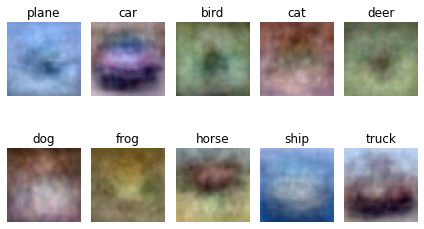

In [10]:
task3(X_train,y_train,X_val,y_val,X_dev,y_dev,X_test,y_test)